<a href="https://colab.research.google.com/github/kumarg160491/internship_task_Socialmedia.com/blob/master/social_comment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Task as Follows:

You have to build a Recommendation System, recommending the items based on the following.
1. Content Based Filtering
2. Collaborative Filtering


End result should be a system that.

1. Recommend posts for the given user
2. Recommend similar posts for the given post

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.sparse as sparse
#!pip install implicit
import random
import implicit
from sklearn.preprocessing import MinMaxScaler

In [0]:
posts=pd.read_csv('/content/drive/My Drive/Practice/social_media/posts.csv')
users=pd.read_csv('/content/drive/My Drive/Practice/social_media/users.csv')
views=pd.read_csv('/content/drive/My Drive/Practice/social_media/views.csv')

In [0]:
posts.rename(columns={'_id':'post_id', 'title':'title', 'category':'category', ' post_type':'post_type'},
            inplace=True)

In [7]:
posts.head()

,post_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


In [8]:
users.rename(columns={'_id':'user_id'},inplace=True)
users.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


In [9]:
views.head()

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z


In [10]:
print("\n Posts Data :")
print("shape : ", posts.shape)
print(posts.head())

print("\n Users Data :")
print("shape : ", users.shape)
print(users.head())

print("\n Views Data :")
print("shape : ", views.shape)
print(views.head())


 Posts Data :
shape :  (493, 4)
                    post_id  ... post_type
0  5d62abaa65218653a132c956  ...      blog
1  5d6d39567fa40e1417a4931c  ...      blog
2  5d7d23315720533e15c3b1ee  ...      blog
3  5d7d405e5720533e15c3b1f3  ...   artwork
4  5d80dfbc6c53455f896e600e  ...      blog

[5 rows x 4 columns]

 Users Data :
shape :  (118, 4)
                    user_id                  name gender      academics
0  5d60098a653a331687083238  Nivesh Singh Chauhan   male  undergraduate
1  5d610ae1653a331687083239         Gaurav Sharma   male       graduate
2  5d618359fc5fcf3bdd9a0910         Akshay Mishra   male  undergraduate
3  5d6d2bb87fa40e1417a49315        Saksham Mathur   male  undergraduate
4  5d7c994d5720533e15c3b1e9         Varun Chowhan   male  undergraduate

 Views Data :
shape :  (1449, 3)
                    user_id                   post_id                 timestamp
0  5df49b32cc709107827fb3c7  5ec821ddec493f4a2655889e  2020-06-01T10:46:45.131Z
1  5ed3748576027d35905ccaab 

In [0]:
# we found that we have 493 posts from 118 users and had 1449 views

In [0]:
combine=pd.merge(left=views,right=posts,how='inner',on='post_id')
combine=pd.merge(left=combine,right=users,how='inner',on='user_id')

In [34]:
combine.head(10)

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics,post_type_strength
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate,1.0
1,5df49b32cc709107827fb3c7,5ec1fd0974f7660d73aa0fd5,2020-05-18T08:35:28.241Z,Daaku,Drawings,artwork,Niriksha Sharma,female,undergraduate,1.0
2,5df49b32cc709107827fb3c7,5ecd5d417023451e662235c5,2020-05-26T20:11:07.153Z,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog,Niriksha Sharma,female,undergraduate,2.0
3,5df49b32cc709107827fb3c7,5ecb72c0eaff6b0c3a58a48e,2020-05-25T07:27:20.699Z,EID MUBARAK,Photography|Architecture|Visual Arts|Graphic D...,artwork,Niriksha Sharma,female,undergraduate,1.0
4,5df49b32cc709107827fb3c7,5ea5aacd10426255a7aa9b71,2020-05-13T09:20:46.457Z,Photography Composition,NaN,project,Niriksha Sharma,female,undergraduate,4.0
5,5df49b32cc709107827fb3c7,5ea5aacd10426255a7aa9b71,2020-04-26T15:38:02.459Z,Photography Composition,NaN,project,Niriksha Sharma,female,undergraduate,4.0
6,5df49b32cc709107827fb3c7,5ec3c09274f7660d73aa1229,2020-05-25T07:26:57.220Z,Dakrai Artwork.,Pen and ink,artwork,Niriksha Sharma,female,undergraduate,1.0
7,5df49b32cc709107827fb3c7,5ec573a3f2781131cc7e51b8,2020-05-25T07:26:42.046Z,My First Animated Post.,Art; Science,skill,Niriksha Sharma,female,undergraduate,3.0
8,5df49b32cc709107827fb3c7,5ecb7155eaff6b0c3a58a486,2020-05-25T07:26:16.658Z,Eid Mubarak,Photography|Architecture|Visual Arts|Graphic D...,artwork,Niriksha Sharma,female,undergraduate,1.0
9,5df49b32cc709107827fb3c7,5ecb6edeeaff6b0c3a58a479,2020-05-25T07:08:29.178Z,Happy Eid-ul-Fitr 2020,Photography|Architecture,artwork,Niriksha Sharma,female,undergraduate,1.0


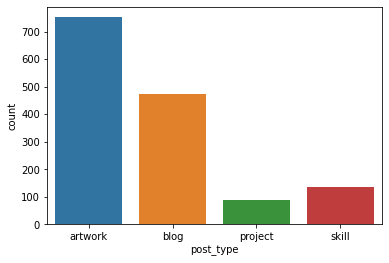

In [14]:
sns.countplot(combine.post_type)

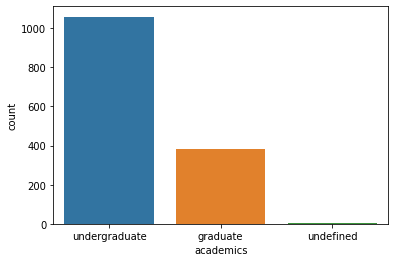

In [15]:
sns.countplot(combine.academics)

In [16]:
combine.post_type.value_counts()

artwork    752
blog       472
skill      136
project     87
Name: post_type, dtype: int64

In [0]:
post_type_strength={'artwork':1.0,
'blog':2.0,
'skill':3.0,
'project':4.0}

In [0]:
combine['post_type_strength']=combine['post_type'].apply(lambda x : post_type_strength[x])

In [19]:
combine.head()

,user_id,post_id,timestamp,title,category,post_type,name,gender,academics,post_type_strength
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z,Save Earth.,Visual Arts|Graphic Design|Artistic design|Gra...,artwork,Niriksha Sharma,female,undergraduate,1.0
1,5df49b32cc709107827fb3c7,5ec1fd0974f7660d73aa0fd5,2020-05-18T08:35:28.241Z,Daaku,Drawings,artwork,Niriksha Sharma,female,undergraduate,1.0
2,5df49b32cc709107827fb3c7,5ecd5d417023451e662235c5,2020-05-26T20:11:07.153Z,"Machine Learning”&“Operations"" (MlOps)",Computer Technology|Machine Learning,blog,Niriksha Sharma,female,undergraduate,2.0
3,5df49b32cc709107827fb3c7,5ecb72c0eaff6b0c3a58a48e,2020-05-25T07:27:20.699Z,EID MUBARAK,Photography|Architecture|Visual Arts|Graphic D...,artwork,Niriksha Sharma,female,undergraduate,1.0
4,5df49b32cc709107827fb3c7,5ea5aacd10426255a7aa9b71,2020-05-13T09:20:46.457Z,Photography Composition,NaN,project,Niriksha Sharma,female,undergraduate,4.0


In [0]:
# We get the final result of grouped post_type_Strength

In [21]:
combine.drop_duplicates()
group_combine=combine.groupby(['user_id','post_id','title']).sum().reset_index()
group_combine.sample(10)

,user_id,post_id,title,post_type_strength
834,5e3563348d344822fed4d13a,5ec7a699ec493f4a2655883a,HUMAN ILLUSTRATION (With Galaxy Background),1.0
1343,5ed0d9bc76027d35905cc2c2,5ed09ad076027d35905cc15f,Understanding Cloud Computing(AWS),2.0
514,5deeef6142a8854bf6eabab9,5e943363a3258347b42f2813,Sunset,1.0
698,5df20f1fee4bb5252b4f5351,5ecc1d4eeaff6b0c3a58a565,Faith in yourself,1.0
691,5df20f1fee4bb5252b4f5351,5ec2f7c074f7660d73aa116e,Making of Daaku Art,3.0
1116,5e942f7ba3258347b42f280e,5e9435f7a3258347b42f281a,Peaceful,1.0
753,5df49b32cc709107827fb3c7,5ec3c09274f7660d73aa1229,Dakrai Artwork.,1.0
1264,5ec3ba5374f7660d73aa1201,5ec7a8bdec493f4a26558846,HUMAN ILLUSTRATION,1.0
634,5df20f1fee4bb5252b4f5351,5e2d516fc85ab714a7da66dd,'The Virtual ME',1.0
1330,5ecf6e6576027d35905cbeec,5ed0007a76027d35905cc0ea,A solar-powered microbrewery has design-led en...,1.0


In [0]:
group_combine.user_id=group_combine.user_id.astype('category')
group_combine.post_id=group_combine.post_id.astype('category')
group_combine.title=group_combine.title.astype('category')

In [0]:
group_combine.user_id=group_combine.user_id.cat.codes
group_combine.post_id=group_combine.post_id.cat.codes

In [0]:
sparse_post_user = sparse.csr_matrix((group_combine['post_type_strength'].astype(float), (group_combine['user_id'], group_combine['post_id'])))
sparse_user_post = sparse.csr_matrix((group_combine['post_type_strength'].astype(float), (group_combine['post_id'], group_combine['user_id'])))

In [25]:
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

GPU training requires factor size to be a multiple of 32. Increasing factors from 20 to 32.


In [26]:
alpha = 15
data = (sparse_post_user * alpha).astype('double')
model.fit(data)

In [27]:
post_id = 1
n_similar = 10

user_vecs = model.user_factors
post_vecs = model.item_factors

post_norms = np.sqrt((post_vecs * post_vecs).sum(axis=1))

scores = post_vecs.dot(post_vecs[post_id]) / post_norms
top_idx = np.argpartition(scores, -n_similar)[-n_similar:]
similar = sorted(zip(top_idx, scores[top_idx] / post_norms[post_id]), key=lambda x: -x[1])

for post in similar:
    idx, score = post
    print(group_combine.title.loc[group_combine.post_id == idx].iloc[0])

Ml and AI
The Periodic Table
HOW INTERNAL AUDIT WORKS
Business skills
'The Virtual ME'
Trident
Navigation system using BFS DFS algorithms
PHP
Promotional video.
SEO (Search Engine Optimization)


In [28]:
def recommend(user_id, sparse_user_post, user_vecs, post_vecs, num_posts=10):
    # Get the interactions scores from the sparse person content matrix
    user_interactions = sparse_user_post[user_id,:].toarray()
    # Add 1 to everything, so that articles with no interaction yet become equal to 1
    user_interactions = user_interactions.reshape(-1) + 1
    # Make articles already interacted zero
    user_interactions[user_interactions > 1] = 0
    # Get dot product of person vector and all content vectors
    rec_vector = user_vecs[user_id,:].dot(post_vecs.T).toarray()
    
    # Scale this recommendation vector between 0 and 1
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    # Content already interacted have their recommendation multiplied by zero
    recommend_vector = user_interactions * rec_vector_scaled
    # Sort the indices of the content into order of best recommendations
    post_idx = np.argsort(recommend_vector)[::-1][:num_posts]
    
    # Start empty list to store titles and scores
    titles = []
    scores = []

    for idx in post_idx:
        # Append titles and scores to the list
        titles.append(group_combine.title.loc[group_combine.post_id == idx].iloc[0])
        scores.append(recommend_vector[idx])

    recommendations = pd.DataFrame({'title': titles, 'score': scores})

    return recommendations
    
# Get the trained person and content vectors. We convert them to csr matrices
user_vecs = sparse.csr_matrix(model.user_factors)
post_vecs = sparse.csr_matrix(model.item_factors)

# Create recommendations for person with id 50
user_id = 50

recommendations = recommend(user_id, sparse_user_post, user_vecs, post_vecs)

print(recommendations)

                           title     score
0    Marital Rape - Rape is Rape  0.248229
1            Colours of pushkar.  0.229970
2  Traditional and Modern Sports  0.174397
3             Sociology in India  0.129288
4                    Calligraphy  0.125932
5                    Best friend  0.121669
6              Computer Graphics  0.111155
7                         Abacus  0.098323
8                         E-Cash  0.081331
9               Forms of Cartel.  0.073699


Here we have top 10 recommendations for user_id = 50. Let’s get top 10 articles this person has interacted with.

In [33]:
group_combine.loc[group_combine['user_id']==50].sort_values(by=['post_type_strength'], ascending=False)[['title', 'user_id', 'post_type_strength']].head(10)

,title,user_id,post_type_strength
1085,Are We Alone In The Universe?,50,2.0
1087,आमची मुंबाई !!!,50,2.0
1083,Leap of faith,50,1.0
1084,Night View Ha Penny Bridge in Dublin Ireland,50,1.0
1086,BEING CREATIVE☺☺,50,1.0
